# Pymaceuticals Inc.

In [33]:
# Import the required packages
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

#File path
mouse_metadata_path = "D:/Data analytics bootcamp/week5/Module_5_challenge/Matplotlib_challenge/Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "D:/Data analytics bootcamp/week5/Module_5_challenge/Matplotlib_challenge/Starter_Code/Pymaceuticals/data/Study_results.csv"

# Load the mouse metadata and study results CSV files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge the two datasets using "Mouse ID" as the common identifier
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

#converting timepoint column to int
merged_data['Timepoint'] = pd.to_numeric(merged_data['Timepoint'], errors='coerce')

#sorting data by ascending order on timepoint
merged_data = merged_data.sort_values("Timepoint", ascending = True).reset_index(drop=True)

# Display the merged dataset
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,w584,0,45.0,0,Infubinol,Male,3,29
2,p136,0,45.0,0,Zoniferol,Female,5,28
3,a411,0,45.0,0,Ramicane,Male,3,22
4,b447,0,45.0,0,Ceftamin,Male,2,30


In [34]:
# Checking the number of mice.
num_unique_mice = merged_data["Mouse ID"].nunique()
print(f'There are {num_unique_mice} mouse IDs in the dataset')

There are 249 mouse IDs in the dataset


In [35]:
#Checking for duplicate time points
duplicate_mouse = merged_data.groupby(['Mouse ID','Timepoint'])['Timepoint'].count()
duplicate_mouse = duplicate_mouse[duplicate_mouse > 1]
print(f'Mouse IDs with duplicate time points: {duplicate_mouse.index.get_level_values(0).unique()}')

# Displaying the data associated with that mouse ID
duplicate_mouse_id = duplicate_mouse.index.get_level_values(0).unique()[0]
duplicate_mouse_data = merged_data.loc[merged_data['Mouse ID'] == duplicate_mouse_id]
print(f"Data for Mouse ID '{duplicate_mouse_id}':")

Mouse IDs with duplicate time points: Index(['g989'], dtype='object', name='Mouse ID')
Data for Mouse ID 'g989':


In [36]:
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
229,g989,0,45.000000,0,Propriva,Female,21,26
232,g989,0,45.000000,0,Propriva,Female,21,26
277,g989,5,47.570392,0,Propriva,Female,21,26
335,g989,5,48.786801,0,Propriva,Female,21,26
599,g989,10,49.880528,0,Propriva,Female,21,26
600,g989,10,51.745156,0,Propriva,Female,21,26
736,g989,15,51.325852,1,Propriva,Female,21,26
742,g989,15,53.442020,0,Propriva,Female,21,26
1080,g989,20,54.657650,1,Propriva,Female,21,26
1102,g989,20,55.326122,1,Propriva,Female,21,26


In [37]:
# Creating a new DataFrame with the duplicate mouse removed
cleaned_data = merged_data.loc[merged_data['Mouse ID'] != duplicate_mouse_id]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,w584,0,45.0,0,Infubinol,Male,3,29
2,p136,0,45.0,0,Zoniferol,Female,5,28
3,a411,0,45.0,0,Ramicane,Male,3,22
4,b447,0,45.0,0,Ceftamin,Male,2,30


In [38]:
# Displaying the updated number of unique mice IDs
new_unique_mice = cleaned_data['Mouse ID'].nunique()
print(f'Number of unique mice IDs after removing duplicate: {new_unique_mice}')

Number of unique mice IDs after removing duplicate: 248


# Summary Statistics

In [39]:
# Grouping the data by drug regimen
grouped_data = cleaned_data.groupby('Drug Regimen')

# Calculating the mean of tumor volume for each regimen
mean = grouped_data['Tumor Volume (mm3)'].mean()

# Calculating the median of tumor volume for each regimen
median = grouped_data['Tumor Volume (mm3)'].median()

# Calculating the variance of tumor volume for each regimen
variance = grouped_data['Tumor Volume (mm3)'].var()

# Calculating the standard deviation of tumor volume for each regimen
std_deviation = grouped_data['Tumor Volume (mm3)'].std()

# Calculating the standard error of the mean of tumor volume for each regimen
sem = grouped_data['Tumor Volume (mm3)'].sem()

# Creating a summary statistics DataFrame
summary_stats = pd.DataFrame({'Mean': mean,
                              'Median': median,
                              'Variance': variance,
                              'Standard Deviation': std_deviation,
                              'SEM': sem})

# Displaying the summary statistics DataFrame
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# Grouping the data by drug regimen and then computing the required statistics
summary_stats = cleaned_data.groupby('Drug Regimen') \
                         .agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

# Renaming the columns for ease of use
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

# Displaying the summary statistics
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

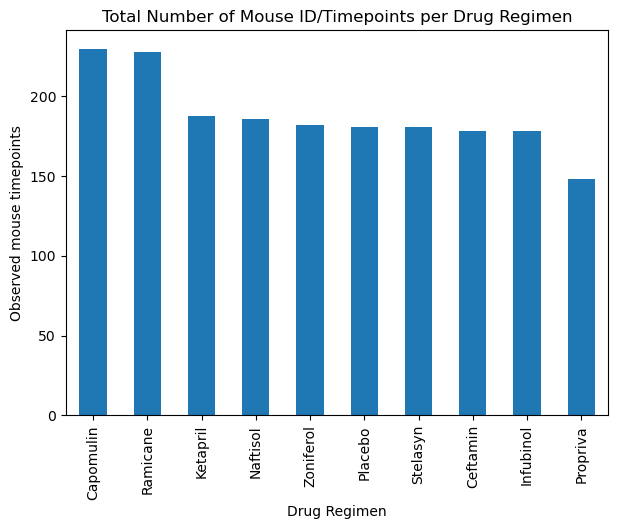

In [41]:
# Bar Chart using Pandas plot() Method

# Grouping cleaned_df by drug regimen
drug_group = cleaned_data.groupby('Drug Regimen')

# Counting the number of unique Mouse IDs for each drug regimen
mouse_count = drug_group['Mouse ID'].count()

# Sorting the mouse_count in ascending order
mouse_count = mouse_count.sort_values(ascending = False)

# Creating a bar chart using Pandas plot() method
mouse_count.plot(kind='bar', figsize=(7,5), rot=0,
                 title='Total Number of Mouse ID/Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('Observed mouse timepoints')
plt.show()

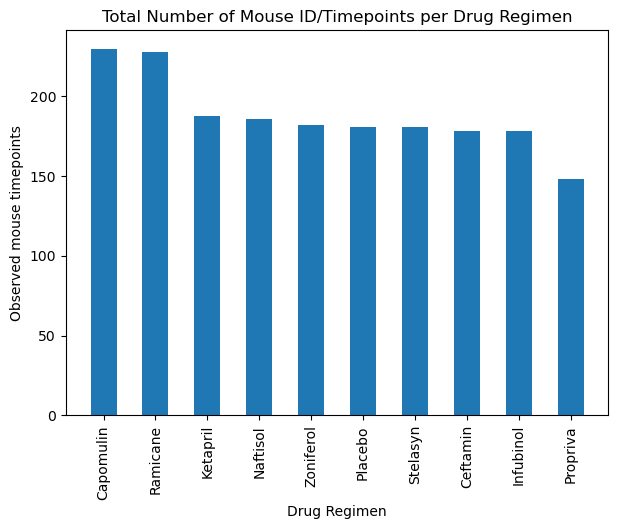

In [42]:
#Bar Chart using Matplotlib's Pyplot Methods

# Creating a bar chart using Matplotlib's Pyplot methods
plt.figure(figsize=(7,5))
plt.bar(mouse_count.index, mouse_count.values, width=0.5, align='center')
plt.xticks(rotation=90)
plt.title('Total Number of Mouse ID/Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Observed mouse timepoints')
plt.show()

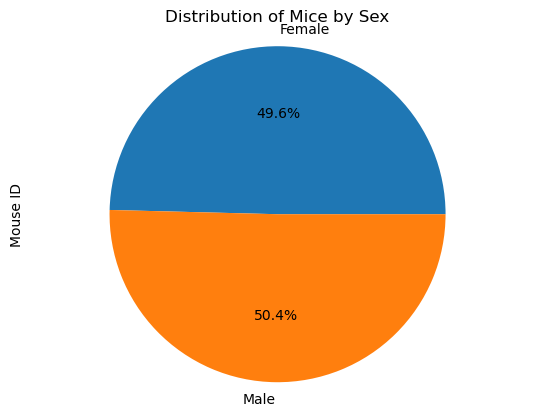

In [43]:
#Pie Chart using Pandas plot() Method

# Grouping cleaned_df by sex
sex_group = cleaned_data.groupby('Sex')

# Counting the number of unique Mouse IDs for each sex
sex_count = sex_group['Mouse ID'].nunique()

# Creating a pie chart using Pandas plot() method
sex_count.plot(kind='pie', autopct='%1.1f%%', startangle=0, shadow=False,
               title='Distribution of Mice by Sex')

# Changing the legend labels
plt.axis('equal')
plt.show()

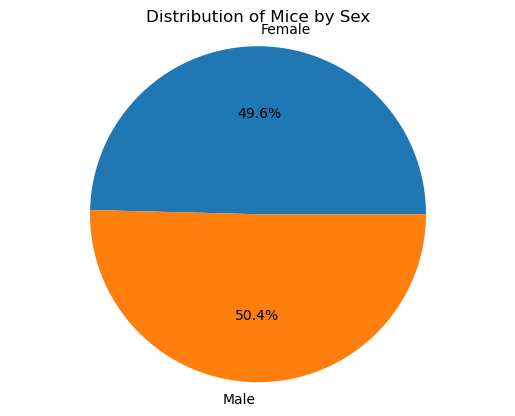

In [44]:
# Pie Chart using Matplotlib's Pyplot Methods

# Creating a pie chart using Matplotlib's Pyplot methods
labels = sex_count.index
sizes = sex_count.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0, shadow=False)
plt.axis('equal')
plt.title('Distribution of Mice by Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [45]:
# Get the last timepoint for each mouse and the corresponding tumor volume
last_timepoint_df = cleaned_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
last_tumor_volume_df = cleaned_data.merge(last_timepoint_df, on=['Mouse ID', 'Timepoint'], how='inner')

# Select the desired treatments
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to hold tumor volume data
tumor_volumes = []

# Loop through each treatment

for treatment in treatments:
    # Get the tumor volume data for the current treatment
    tumor_volume_data = last_tumor_volume_df.loc[last_tumor_volume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volumes.append(tumor_volume_data)
    
    # Calculate the quartiles and IQR for the current treatment
    quartiles = tumor_volume_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine the upper and lower bounds for outliers
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Determine the potential outliers for the current treatment
    outliers = tumor_volume_data.loc[(tumor_volume_data < lower_bound) | (tumor_volume_data > upper_bound)]
    
    # Print the potential outliers for the current treatment
    print(f"{treatment}'s potential outliers: {outliers.reset_index(drop=True)}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 0    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


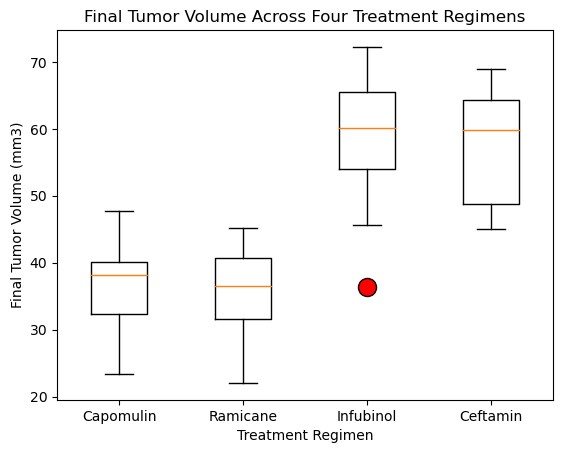

In [51]:
# Create box plot using Matplotlib
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, labels=treatment_list, flierprops=dict(markerfacecolor='red', marker='o', markersize=13))
ax.set_title('Final Tumor Volume Across Four Treatment Regimens')
ax.set_xlabel('Treatment Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

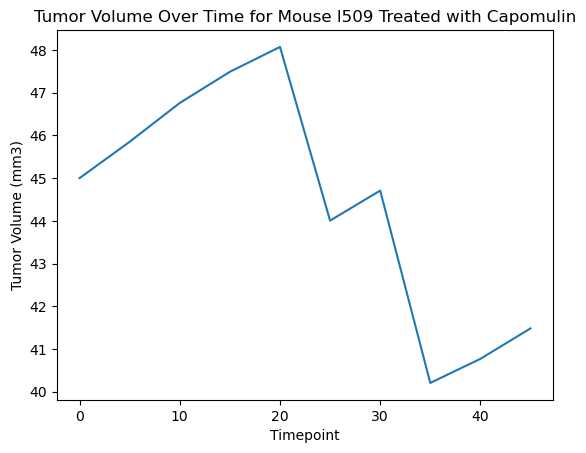

In [15]:
# Select the desired treatment
treatment = 'Capomulin'

# Get the data for a single mouse treated with Capomulin and create a line plot
mouse_id = 'l509'
mouse_data = cleaned_data.loc[(cleaned_data['Drug Regimen'] == treatment) & (cleaned_data['Mouse ID'] == mouse_id)]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# Add labels
plt.title(f"Tumor Volume Over Time for Mouse {mouse_id} Treated with {treatment}")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

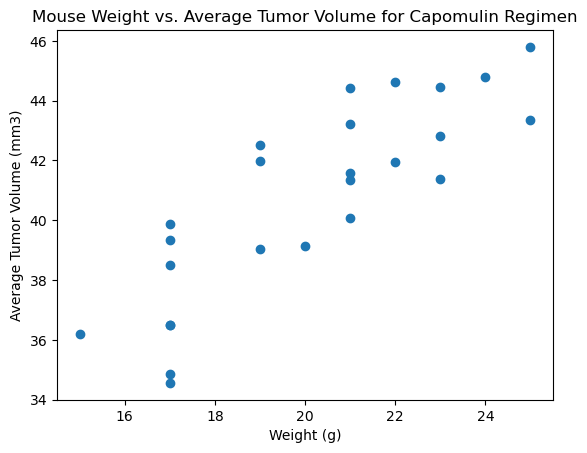

In [16]:
# Get the average tumor volume and weight for each mouse treated with Capomulin and create a scatter plot
capomulin_data = cleaned_data.loc[cleaned_data['Drug Regimen'] == treatment]
mouse_data = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'}).reset_index()
plt.scatter(mouse_data['Weight (g)'], mouse_data['Tumor Volume (mm3)'], marker='o')

# Add labels
plt.title(f"Mouse Weight vs. Average Tumor Volume for {treatment} Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

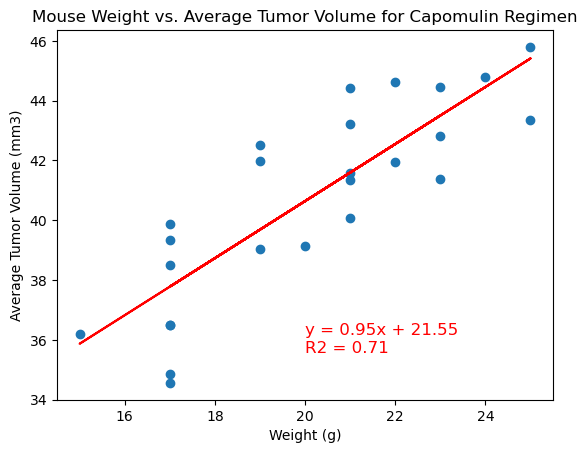

In [17]:
from scipy.stats import linregress

# Get the average tumor volume and weight for each mouse treated with Capomulin and create a scatter plot
capomulin_data = cleaned_data.loc[cleaned_data['Drug Regimen'] == treatment]
mouse_data = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'}).reset_index()
plt.scatter(mouse_data['Weight (g)'], mouse_data['Tumor Volume (mm3)'], marker='o')

# Add labels
plt.title(f"Mouse Weight vs. Average Tumor Volume for {treatment} Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Calculate the correlation coefficient and linear regression model
correlation = st.pearsonr(mouse_data['Weight (g)'], mouse_data['Tumor Volume (mm3)'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_data['Weight (g)'], mouse_data['Tumor Volume (mm3)'])
regress_values = mouse_data['Weight (g)'] * slope + intercept
plt.plot(mouse_data['Weight (g)'], regress_values, "r-")

# Add the equation of the regression line to the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR2 = {rvalue**2:.2f}\n"
plt.text(20, 35, equation, fontsize=12, color='red')

# Show the plot
plt.show()